In [90]:
import sys
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install scipy
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pillow
!{sys.executable} -m pip install opencv-python

You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
    100% |████████████████████████████████| 41.9MB 29kB/s eta 0:00:011 1% |▋                               | 808kB 1.2MB/s eta 0:00:34    28% |█████████                       | 11.9MB 1.5MB/s eta 0:00:21
You are using pip version 9.0.3, however version 10.0.1 is available.
Y

In [1]:
import scipy
import scipy.ndimage
import matplotlib.pyplot as plt 
import numpy as np 
from PIL import Image

# IMPORTING IMAGE USING SCIPY AND TAKING R,G,B COMPONENTS

def comp_2d(image_2d, p_comps): # FUNCTION FOR RECONSTRUCTING 2D MATRIX USING PCA
    
    cov_mat = image_2d - np.mean(image_2d , axis = None)
    eig_val, eig_vec = np.linalg.eigh(np.cov(cov_mat)) # USING "eigh", SO THAT PROPRTIES OF HERMITIAN MATRIX CAN BE USED
    p = np.size(eig_vec, axis = None)
    idx = np.argsort(eig_val)
    idx = idx[::-1]
    eig_vec = eig_vec[:,idx]
    eig_val = eig_val[idx]
    numpc = p_comps # THIS IS NUMBER OF PRINCIPAL COMPONENTS, YOU CAN CHANGE IT AND SEE RESULTS
    if numpc <p or numpc >0:
        eig_vec = eig_vec[:, range(numpc)]
    score = np.dot(eig_vec.T, cov_mat)
    recon = np.dot(eig_vec, score) + np.mean(image_2d, axis = None).T # SOME NORMALIZATION CAN BE USED TO MAKE IMAGE QUALITY BETTER
    recon_img_mat = np.uint8(np.absolute(recon)) # TO CONTROL COMPLEX EIGENVALUES
    return recon_img_mat

def p_comps(image, i):
    a = Image.open(image)
    
    a_np = np.array(a)
    a_r = a_np[:,:,0]
    a_g = a_np[:,:,1]
    a_b = a_np[:,:,2]

    a_r_recon, a_g_recon, a_b_recon = comp_2d(a_r, i), comp_2d(a_g, i), comp_2d(a_b, i) # RECONSTRUCTING R,G,B COMPONENTS SEPARATELY
    recon_color_img = np.dstack((a_r_recon, a_g_recon, a_b_recon)) # COMBINING R.G,B COMPONENTS TO PRODUCE COLOR IMAGE
    recon_color_img = Image.fromarray(recon_color_img)

    return recon_color_img
    

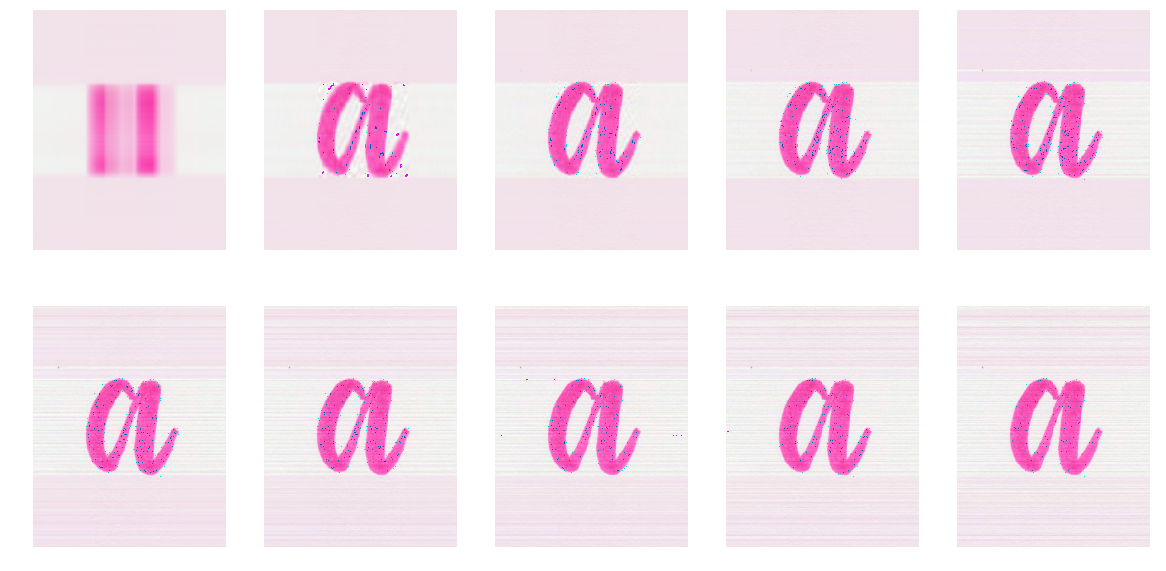

In [2]:
plt.figure(figsize=(20, 10))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(p_comps("recortes/1/1.jpg", 1+(i*10)))
    plt.axis("off")
plt.show()

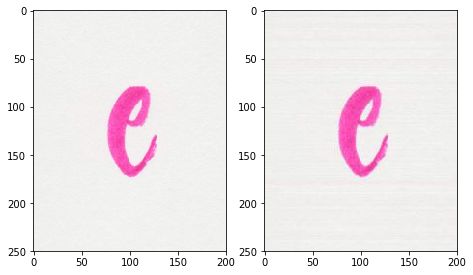

In [3]:
file = ""
newfile = ""
for x in range(1,9):
    for i in range(1,28):
        file = "recortes/" + str(x) + "/" + str(i) + ".jpg"
        newfile = "pca/" + str(x) + "/" + str(i) + ".jpg"
        img_comps = p_comps(file, 100)
        img_comps.save(newfile)

plt.figure(figsize=(20, 10))
plt.subplot(2, 5, 1)
no_pca = Image.open("recortes/1/5.jpg")
plt.imshow(no_pca)
plt.subplot(2, 5, 2)
pca = Image.open("pca/1/5.jpg")
plt.imshow(pca)
width,height = pca.size
plt.show()


In [4]:
#Cargar y convertir imagen en escala de grises

#Header del dataset
pixels_header = ["Class", "isFont"]
for i in range(width*height):
    pixels_header.append("Pixel " + str(i))
pixels_data = np.array(pixels_header)
#Cargar todos las imagenes 
file = ""
for x in range(1,9):
    for i in range(1, 28):
        file = "recortes/" + str(x) + "/" + str(i) + ".jpg"

        img = Image.open(file).convert('LA')
        pixels = np.asarray(img)

        #Convertir imagen a un array
        pixels_array = [i]
        isFont = 1
        if x>4:
            isFont = 0
        pixels_array.append(isFont)
        
        for i in range(height):
            for j in range(width):
                pixels_array.append(int(pixels[i][j][0]) + int(pixels[i][j][1]))

        pixels_arr = np.array(pixels_array)
        #Añadir la imagen al dataset
        pixels_data = np.vstack([pixels_data, pixels_arr])

for x in range(1,9):
    for i in range(1, 28):
        file = "pca/" + str(x) + "/" + str(i) + ".jpg"

        img = Image.open(file).convert('LA')
        pixels = np.asarray(img)

        #Convertir imagen a un array
        pixels_array = [i]
        isFont = 1
        if x>4:
            isFont = 0
        pixels_array.append(isFont)
        
        for i in range(height):
            for j in range(width):
                pixels_array.append(int(pixels[i][j][0]) + int(pixels[i][j][1]))

        pixels_arr = np.array(pixels_array)
        #Añadir la imagen al dataset
        pixels_data = np.vstack([pixels_data, pixels_arr])        

print(pixels_data.shape)

(433, 50002)


In [5]:
#Convertir el numpy array a csv
import pandas as pd 
df = pd.DataFrame(pixels_data)
df.to_csv("dataset.csv", header=None, index=False)

## Cargar el dataset creado 

In [6]:
# Load the train and test datasets to create two DataFrames
data = pd.read_csv("dataset.csv")
print(data)

     Class  isFont  Pixel 0  Pixel 1  Pixel 2  Pixel 3  Pixel 4  Pixel 5  \
0        1       1      496      498      499      498      497      495   
1        2       1      494      494      494      495      495      494   
2        3       1      497      497      497      494      498      495   
3        4       1      510      497      497      497      497      498   
4        5       1      494      494      495      494      494      493   
5        6       1      510      496      496      497      494      494   
6        7       1      498      498      497      495      496      495   
7        8       1      510      497      498      495      494      493   
8        9       1      510      497      496      497      497      499   
9       10       1      510      499      498      495      495      495   
10      11       1      510      493      492      495      494      494   
11      12       1      510      498      497      497      496      496   
12      13  

## Decision Tree

In [8]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier,MLPRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit

X = data[pixels_header[2::]].values
y = data[["Class", "isFont"]].values
y_single = data["Class"].values

sss = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=2)
sss.get_n_splits(X, y)

for train_index, test_index in sss.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

target = y
features_one = X    

#Decision tree
d_tree = tree.DecisionTreeClassifier()
d_tree = d_tree.fit(features_one, target)

#Red neuronal logistic regression
#nn = MLPRegressor(activation='logistic',solver='sgd',hidden_layer_sizes=(800,),
#                  random_state=0,max_iter=15000)
#nn.fit(X, y)

## Random Forest Classifier

In [9]:
#Random Forest Classifier
X, y = make_classification(n_samples=378, n_features=50000,
                            n_informative=2, n_redundant=0,
                            random_state=0, shuffle=False)
rfc = RandomForestClassifier(max_depth=50, random_state=0)
rfc.fit(features_one, target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

## Naive Bayes

In [10]:
from sklearn import metrics
from sklearn.model_selection import StratifiedShuffleSplit
#El modelo Naive Bayes con el dataset

X = data[pixels_header[2::]].values
y = data["Class"].values

# Create the target and features numpy arrays: target, features_one
sss = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=2)
sss.get_n_splits(X, y)

for train_index, test_index in sss.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

target = y
features_one = X    

#Naive Bayes
naive = GaussianNB()
naive.fit(features_one, target)    

GaussianNB(priors=None)

## Predecir una imagen

In [11]:
#Cargar imagen y redemencinarla para reconocer la letra
def predict_image(file):
    
    img = Image.open(file).convert('LA')
    img = img.resize((width,height), Image.ANTIALIAS)
    
    pixels = np.asarray(img)

    #Convertir imagen a un array
    pixels_array = [x]
    pixels_array.append(0)
    for i in range(height):
            for j in range(width):
                pixels_array.append(int(pixels[i][j][0]) + int(pixels[i][j][1]))

    pixels_arr = np.array(pixels_array)
    my_prediction_tree = d_tree.predict([pixels_arr[2::]])
    my_prediction_rfc = rfc.predict([pixels_arr[2::]])
    my_prediction_naive = naive.predict([pixels_arr[2::]])
    #my_prediction_nn = nn.predict([pixels_arr[2::]])
    return my_prediction_tree, my_prediction_rfc, my_prediction_naive#, my_prediction_nn
    

## Exactitud de los modelos

In [12]:
total = 7*27*2
tree_vals = 0
rfc_vals = 0
naive_vals = 0
for x in range(1,8):
    for i in range(1, 28):
        file = "recortes/" + str(x) + "/" + str(i) + ".jpg"
        predicted = predict_image(file)
        if(int(predicted[0][0][0]) == i):
            tree_vals+=1
        if(int(predicted[1][0][0]) == i):
            rfc_vals+=1
        if(int(predicted[2][0]) == i):
            naive_vals+=1

for x in range(1,8):
    for i in range(1, 28):
        file = "pca/" + str(x) + "/" + str(i) + ".jpg"
        predicted = predict_image(file)
        if(int(predicted[0][0][0]) == i):
            tree_vals+=1
        if(int(predicted[1][0][0]) == i):
            rfc_vals+=1
        if(int(predicted[2][0]) == i):
            naive_vals+=1
            
print("Decisión tree:\n" + "Aciertos: " + str(tree_vals) + " - Porcentaje de aciertos: " + str(tree_vals/total))
print("Random Forest:\n" + "Aciertos: " + str(rfc_vals) + " - Porcentaje de aciertos: " + str(rfc_vals/total))
print("Naive Bayes:\n" + "Aciertos: " + str(naive_vals) + " - Porcentaje de aciertos: " + str(naive_vals/total))

Decisión tree:
Aciertos: 376 - Porcentaje de aciertos: 0.9947089947089947
Random Forest:
Aciertos: 373 - Porcentaje de aciertos: 0.9867724867724867
Naive Bayes:
Aciertos: 148 - Porcentaje de aciertos: 0.3915343915343915


## Aplicación

### Se desea cargar una imagen de la letra para que reconozca si está bien escrita. Si esta bien escrita muestra que es correcta, si no, muestra la fuente correcta superpuesta a la letra cargada.

(array([[16.,  0.]]), array([[16.,  0.]]), array([16]))
Decision Tree:
La fuente no está muy bien, deberías hacer la letra como la letra rosada.


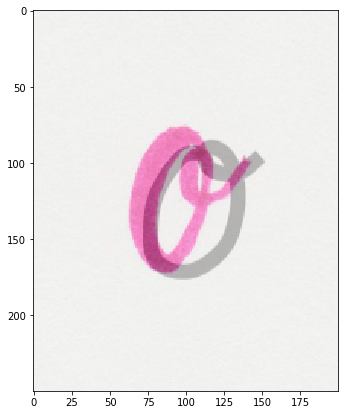

Random Forest:
La fuente no está muy bien, deberías hacer la letra como la letra rosada.


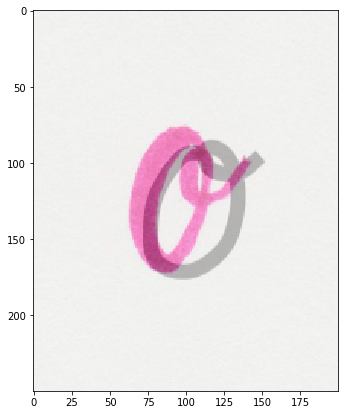

Naive Bayes:


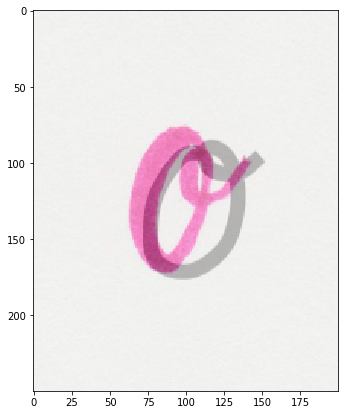

In [59]:
from PIL import Image

def show_errors(image, image_url):
    file = "recortes/1" + "/" + str(image) + ".jpg"
    correct = Image.open(file)
    overlay = Image.open(image_url)

    correct = correct.convert("RGBA")
    overlay = overlay.convert("RGBA")

    new_img = Image.blend(correct, overlay, 0.35)

    plt.figure(figsize=(15, 7))
    plt.imshow(new_img)
    plt.show()
    
    
    
image_url = "test/o.jpg"
predicted = predict_image(image_url)
print(predicted)
print("Decision Tree:")    
if(predicted[0][0][1] < 0.5):
    print("La fuente no está muy bien, deberías hacer la letra como la letra rosada.")
    show_errors(int(predicted[0][0][0]), image_url)
else:
    print("Tu fuente está muy bien.")
    show_errors(int(predicted[0][0][0]), image_url)

print("Random Forest:")
if(predicted[1][0][1] < 0.5):
    print("La fuente no está muy bien, deberías hacer la letra como la letra rosada.")
    show_errors(int(predicted[1][0][0]), image_url)
else:
    print("Tu fuente está muy bien.")
    show_errors(int(predicted[1][0][0]), image_url)
    
print("Naive Bayes:")
show_errors(int(predicted[2][0]), image_url)